<a href="https://colab.research.google.com/github/nlreiser/MSDS-Machine-Learning/blob/main/Reiser_M1_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices: EDA (Kaggle) for MSDS 422 M1 Asmt1

## Ingest

In [244]:
# Import modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.stats.outliers_influence as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [245]:
#Set display to max rows/columns to view all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

*House Prices Data from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)*

In [246]:
# Import test and train datasets
df_test = pd.read_csv('https://raw.githubusercontent.com/nlreiser/MSDS-Machine-Learning/main/Datasets/test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/nlreiser/MSDS-Machine-Learning/main/Datasets/train.csv')

# View first lines of training data
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [247]:
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [248]:
# View first lines of test data
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [249]:
df_test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

In [250]:
#Determine shape of the training data
df_train.shape

(1460, 81)

In [251]:
#Determine shape of the test data
df_test.shape

(1459, 80)

## EDA

In [252]:
# Get preliminary descriptive statistics about the training data
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [254]:
#Retrieve information about the quant/qual variables in the data and if there are any null values in the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [255]:
#Check for any duplicate rows 
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(0, 125)

In [256]:
#Create quantitative and qualitative independent variable sets
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

#Check number of each variable type
print("Number of Numerical features: ", len(quantitative))
print("Number of Categorical features: ", len(qualitative))

Number of Numerical features:  36
Number of Categorical features:  43


There are 81 variables in the data, including Id and SalePrice. 36 variables are quantitative (numerical) and 43 variables are qualitative (categorical). Object datatypes are put in the qualitative bucket and non-object datatypes are put into the quantitative bucket for further analysis. 

In [257]:
#To reduce the number of variables, total bathrooms will be added (full and half bathrooms will be separate).
df_train['Baths'] = df_train['BsmtFullBath'] + df_train['FullBath'] 
df_train['HalfBaths'] = df_train['BsmtHalfBath'] + df_train['HalfBath']
df_train['Baths'].value_counts()

2    750
1    371
3    319
4     18
6      1
0      1
Name: Baths, dtype: int64

In [258]:
df_train['HalfBaths'].value_counts()

0    855
1    572
2     29
3      3
4      1
Name: HalfBaths, dtype: int64

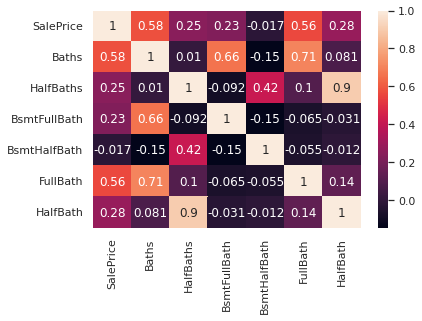

In [259]:
# Check the correlation between SalePrice, the new variable, and the previous variables
sns.heatmap(df_train[['SalePrice', 'Baths', 'HalfBaths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].corr(), annot=True)
plt.show()

In [260]:
#Quantitatively add bathroom (full bathroom are one's place, half bathrooms are tenth's place)
df_train['TotalBaths_Full.Half'] = df_train['Baths'] + 0.1*(df_train['HalfBaths'])
df_train['TotalBaths_Full.Half'].value_counts()

2.0    443
2.1    293
1.0    228
3.0    172
3.1    144
1.1    129
2.2     14
1.2     12
4.0     11
4.1      6
1.3      2
3.2      2
3.3      1
4.2      1
0.4      1
6.0      1
Name: TotalBaths_Full.Half, dtype: int64

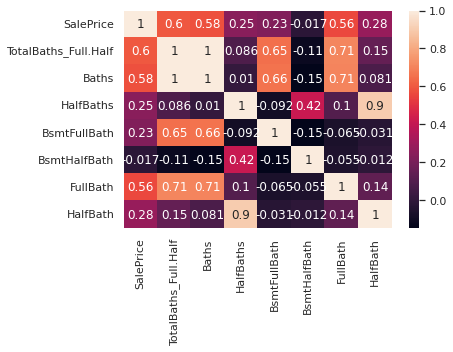

In [261]:
#Plot heatmap of combined bathrooms
sns.heatmap(df_train[['SalePrice', 'TotalBaths_Full.Half', 'Baths', 'HalfBaths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].corr(), annot=True)
plt.show()

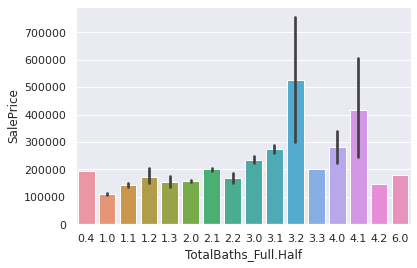

In [262]:
#Plot bar graph of bathrooms vs saleprice
sns.barplot(x='TotalBaths_Full.Half', y='SalePrice', data=df_train)

In [263]:
#Incase more detail is needed, explanation for each bathroom addition is added
df_train['TotalBaths'] = df_train['Baths'].map(str) + 'Full,' + df_train['HalfBaths'].map(str) + 'Half'
df_train['TotalBaths'].value_counts()

2Full,0Half    443
2Full,1Half    293
1Full,0Half    228
3Full,0Half    172
3Full,1Half    144
1Full,1Half    129
2Full,2Half     14
1Full,2Half     12
4Full,0Half     11
4Full,1Half      6
3Full,2Half      2
1Full,3Half      2
6Full,0Half      1
4Full,2Half      1
0Full,4Half      1
3Full,3Half      1
Name: TotalBaths, dtype: int64

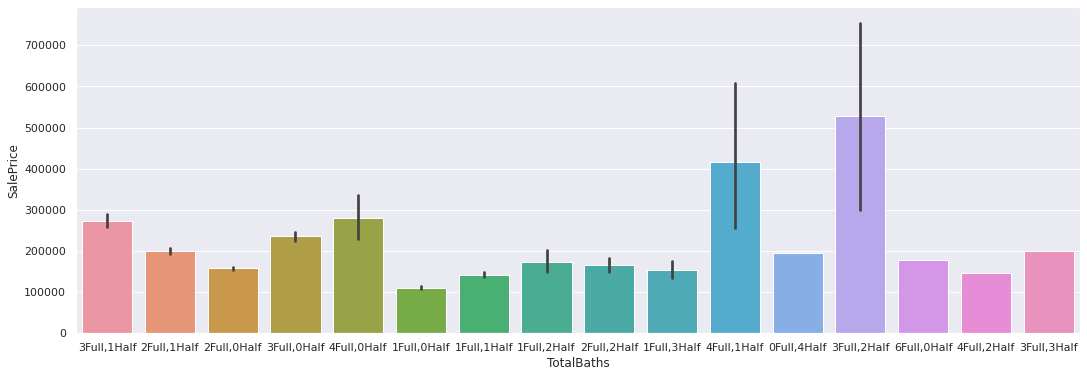

In [269]:
#Double check barplot (bathrooms should be the same agains saleprice)
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x='TotalBaths', y='SalePrice', data=df_train)

In [270]:
#Drop bath columns that are no longer needed 
df_train = df_train.drop(['Baths', 'HalfBaths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

In [271]:
#Check that columns have been dropped
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPo

In [272]:
#To further reduce number of variables, square footage will be totaled (garage not included since these could be detached or missing)
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['GrLivArea']

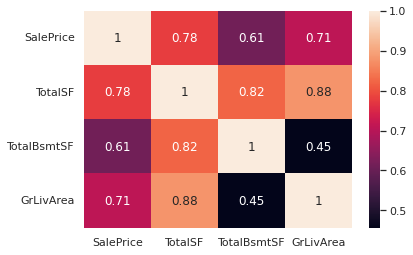

In [279]:
#Plot heatmap of combined bathrooms
sns.set(rc={'figure.figsize':(6,4)})
sns.heatmap(df_train[['SalePrice', 'TotalSF', 'TotalBsmtSF', 'GrLivArea']].corr(), annot=True)
plt.show()

In [280]:
#Drop area columns that are no longer needed 
df_train = df_train.drop(['TotalBsmtSF', 'GrLivArea'], axis=1)

In [282]:
#Check that columns have been dropped
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolAr

In [294]:
#Plot heatmap of combined bathrooms
two_story = []
for value in df_train['2ndFlrSF']:
    if value > 0:
        two_story.append(1)
    else:
        two_story.append(0)
       
df_train['2story'] = two_story 
df_train['2story'].value_counts()

0    829
1    631
Name: 2story, dtype: int64

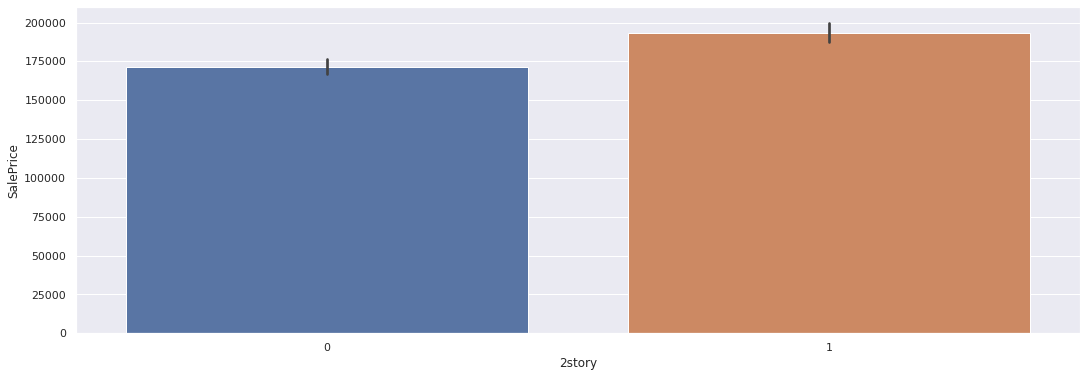

In [296]:
#Plot heatmap of combined bathrooms
sns.set(rc={'figure.figsize':(18,6)})
sns.barplot(x='2story', y='SalePrice', data=df_train)

###Target Variable Distribution: SalePrice

In [240]:
#Get descriptive statistics on the SalePrice
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

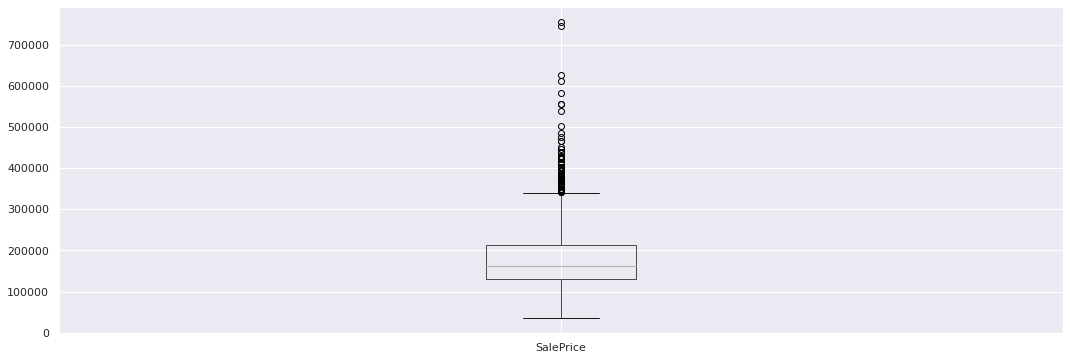

In [241]:
#Create a boxplot of SalePrice to view spread of the costs of houses
df_train.boxplot(column=['SalePrice'])

Skewness: 1.882876
Kurtosis: 6.536282


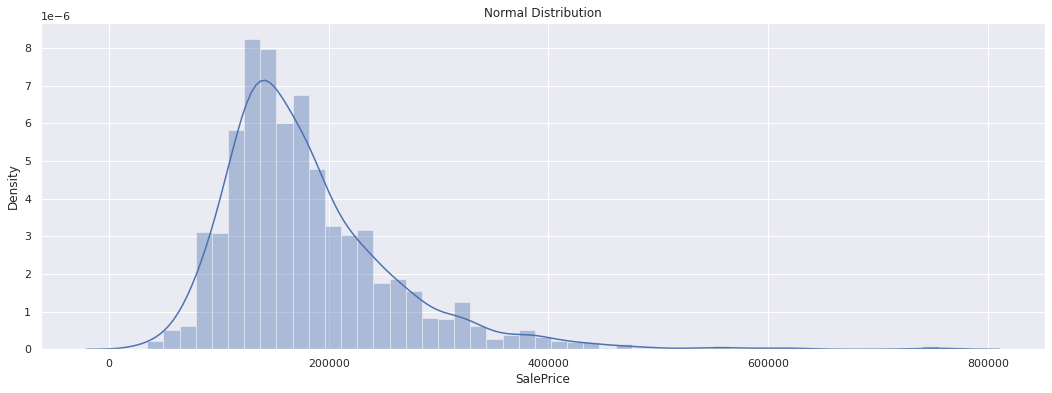

In [242]:
#Plot distribution of SalePrice
sns.distplot(df_train['SalePrice'])
plt.title('Normal Distribution')
#Find skewness and kurtosis 
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


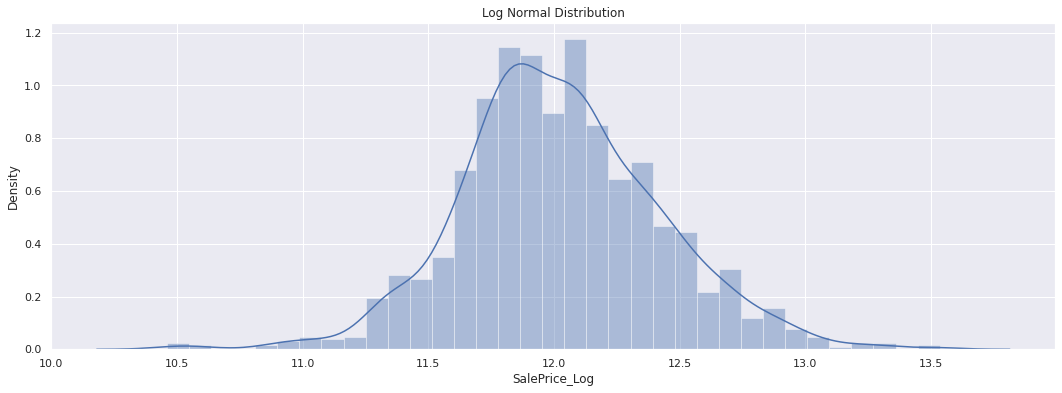

In [243]:
#The plot of SalePrice is not normally distributed - right skewed 
#Transform SalePrice data to log scale to see if it improves the distribution
df_train['SalePrice_Log']=np.log(df_train['SalePrice'])

#View the new distribution plot of SalePrice after log transformation
sns.distplot(df_train['SalePrice_Log'])
plt.title('Log Normal Distribution')
#Find skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

### Null Values - Missing Features

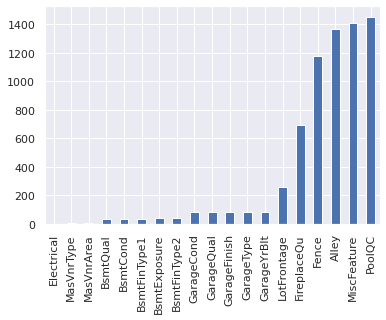

In [142]:
#Find where the null values exist in the training dataset by plotting the counts per variable 
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

19 independent variables have null values. From reading the data description we find that the null values are features that the houses do not have (for example no pool, no basement, etc.) rather than absent data. Replacing the nulls with 0 (quantitative) and missing (qualitative) will allow for accurate distribution plots.  

In [143]:
#Replace null values with value of 0 for quantitative data and 'Missing' for qualitative data
for c in qualitative:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['Missing'])
        df_train[c] = df_train[c].fillna('Missing')

df_train[quantitative] = df_train[quantitative].fillna(0)

### Independent Variable Distributions

In [144]:
#Test if any of the quantitative variables follow a normal distribution
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df_train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


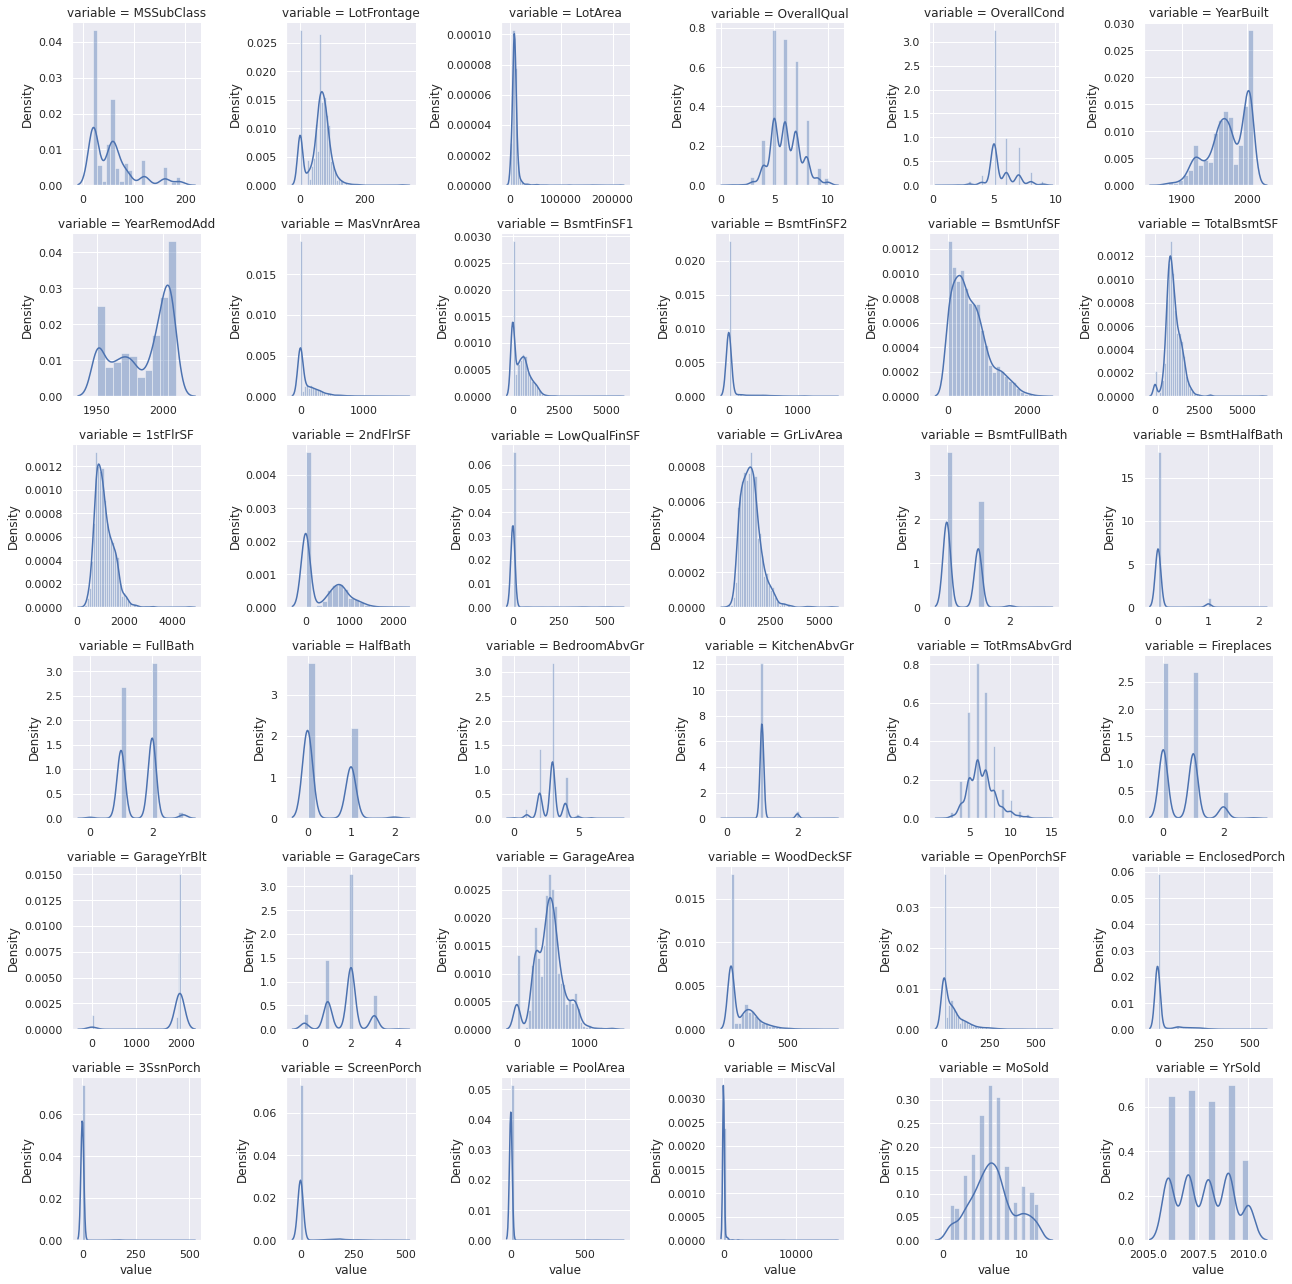

In [145]:
f = pd.melt(df_train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [146]:
#Plot histograms of quantitative features 
#df_train[quantitative].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

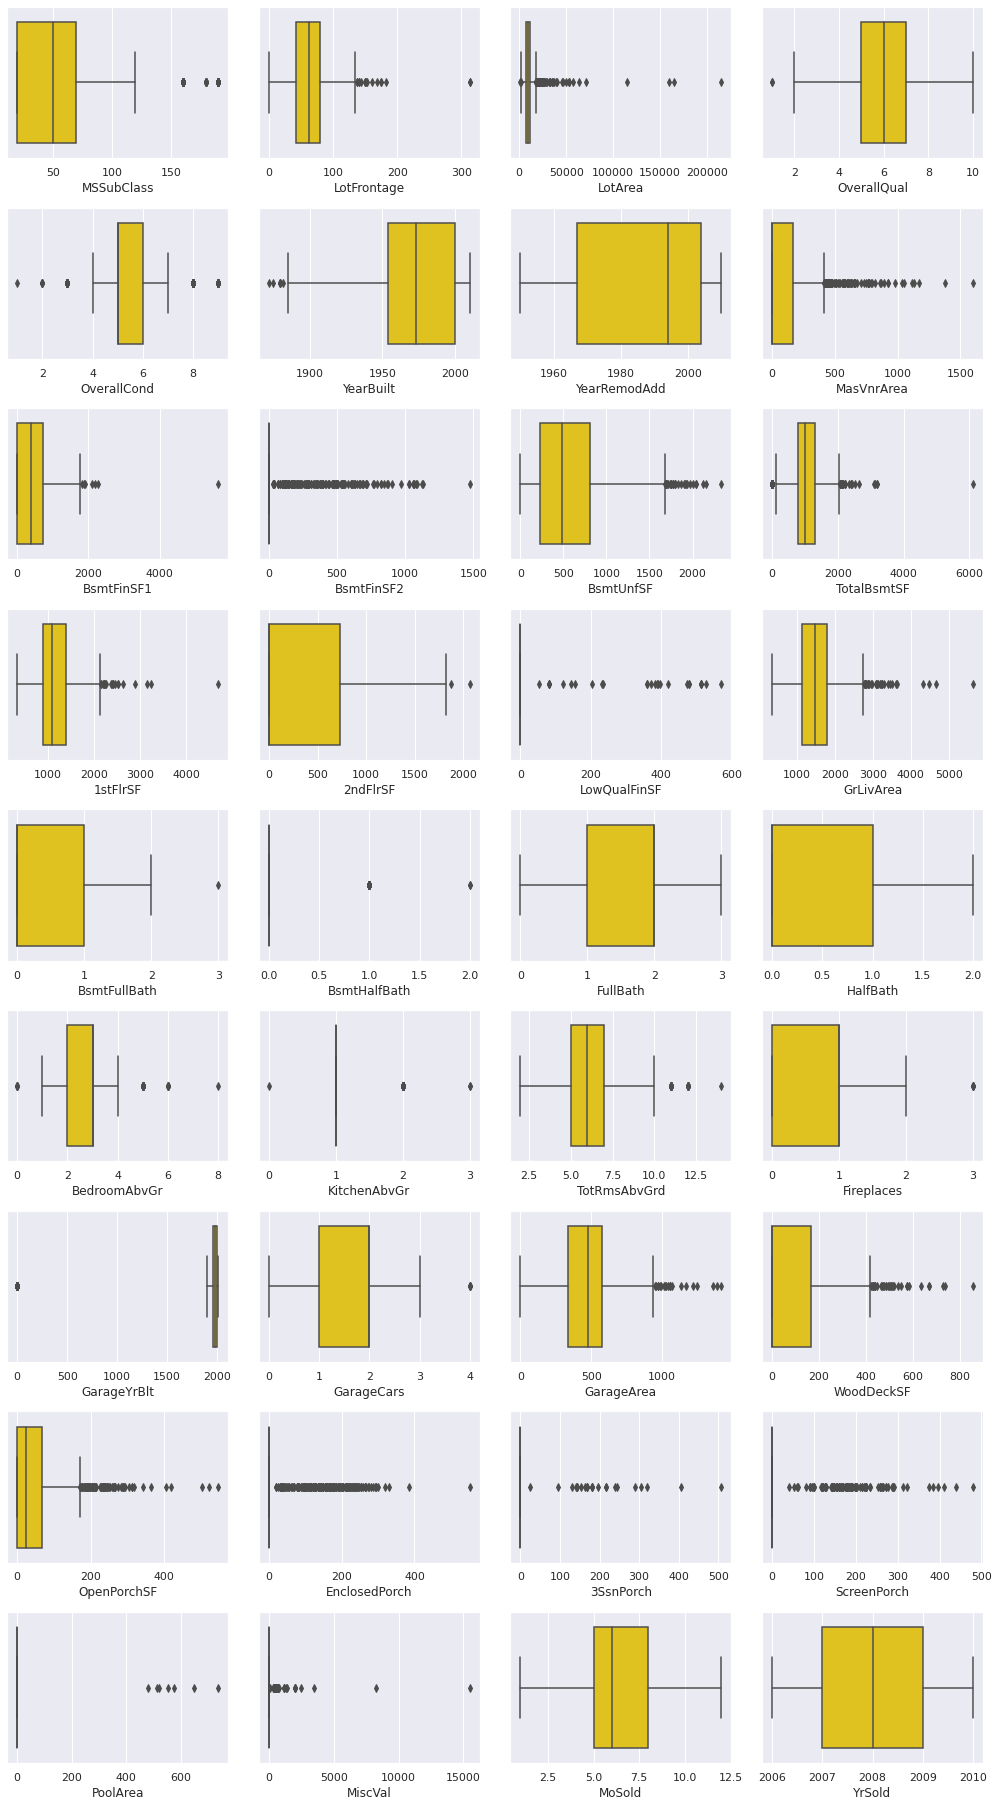

In [147]:
#Plot boxplots to determine quartiles and outliers for quantitative variables
sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,100))

a=len(quantitative)   # No. of rows in subplot
b=4                        # No. of plots in each row
c=1                        # Figure Counter

data=df_train.copy()  # Making a dataset copy

for features in quantitative:
    plt.subplot(a,b,c)
    sns.boxplot(x = data[features], color = 'gold')  # To check for outliers
    c = c + 1  # Incrementing figure counter
     

fig.tight_layout()
plt.show()

In [148]:
#Find skewness of quantitative variables
df_train[quantitative].skew()

MSSubClass        1.407657
LotFrontage       0.267822
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -3.869501
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
dtype: float64

In [149]:
#Find kurtosis of quantitative variables
df_train[quantitative].kurt()

MSSubClass         1.580188
LotFrontage        3.610678
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.141416
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       13.043226
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0.404109
YrSold            -1

Quantitative variables that may have better distribution after log transformation include: TotalBsmtSF, GrLivArea, LotFrontage and LotArea. Other variables may impact the price if they are missing, such as no second floor or no garage.

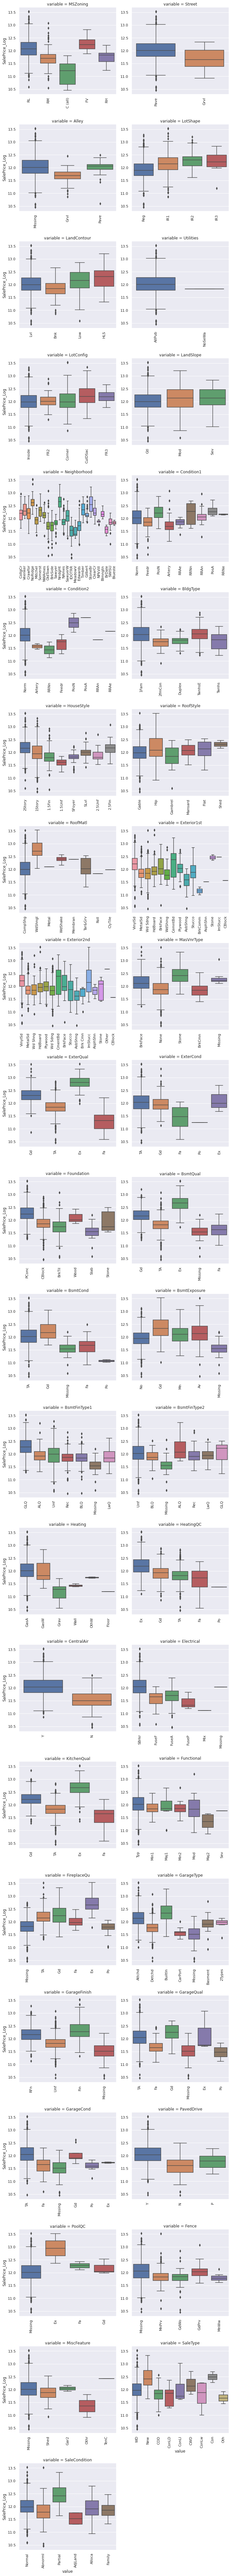

In [150]:
#Create boxplots of qualitative variables against SalePrice_Log 
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df_train, id_vars=['SalePrice_Log'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice_Log")

The qualitative variables have varying impact on the price of the home. Neighborhood impacts the cost of the home. Certain features around the home can raise or lower the cost, for example living near a park can increase the value, while being near a main road may lower the value. Having a kitchen in excellent quality increases the value of the home, as does having a pool in excellent quality. The most expensive homes are partially completed when they are assessed. 

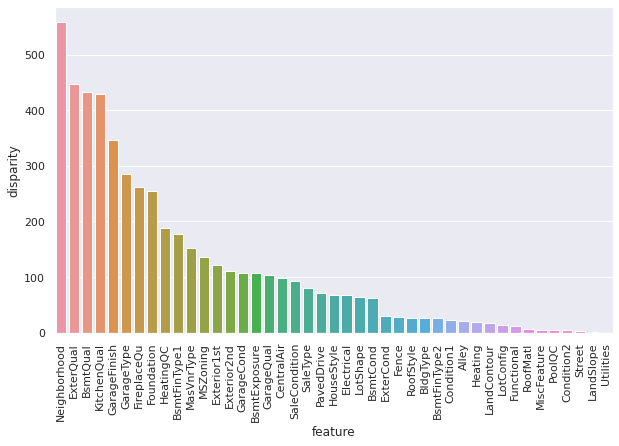

In [21]:
#Run anova test to estimate how qualitative variables affect SalePrice
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice_Log'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

sns.set(rc = {'figure.figsize':(10,6)})
a = anova(df_train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [22]:
#Encode qualitative data to link each qualitative variable type to a number based on SalePrice
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice_Log']].groupby(feature).mean()['SalePrice_Log']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df_train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [23]:
df_train[qual_encoded].head()

MSZoning_E  Street_E  Alley_E  LotShape_E  LandContour_E  Utilities_E  \
0         4.0       2.0      3.0         1.0            2.0          2.0   
1         4.0       2.0      3.0         1.0            2.0          2.0   
2         4.0       2.0      3.0         2.0            2.0          2.0   
3         4.0       2.0      3.0         2.0            2.0          2.0   
4         4.0       2.0      3.0         2.0            2.0          2.0   

   LotConfig_E  LandSlope_E  Neighborhood_E  Condition1_E  Condition2_E  \
0          1.0          1.0            16.0           4.0           5.0   
1          3.0          1.0            21.0           2.0           5.0   
2          1.0          1.0            16.0           4.0           5.0   
3          2.0          1.0            18.0           4.0           5.0   
4          3.0          1.0            25.0           4.0           5.0   

   BldgType_E  HouseStyle_E  RoofStyle_E  RoofMatl_E  Exterior1st_E  \
0         4.0           7.0          2.0         3.0           13.0   
1         4.0           5.0          2.0         3.0            7.0   
2         4.0           7.0          2.0         3.0           13.0   
3         4.0           7.0          2.0         3.0            5.0   
4         4.0           7.0          2.0         3.0           13.0   

   Exterior2nd_E  MasVnrType_E  ExterQual_E  ExterCond_E  Foundation_E  \
0           14.0           3.0          3.0          4.0           6.0   
1            7.0           2.0          2.0          4.0           3.0   
2           14.0           3.0          3.0          4.0           6.0   
3            8.0           2.0          2.0          4.0           2.0   
4           14.0           3.0          3.0          4.0           6.0   

   BsmtQual_E  BsmtCond_E  BsmtExposure_E  BsmtFinType1_E  BsmtFinType2_E  \
0         4.0         4.0             2.0             7.0             6.0   
1         4.0         4.0             5.0             5.0             6.0   
2         4.0         4.0             3.0             7.0             6.0   
3         3.0         5.0             2.0             5.0             6.0   
4         4.0         4.0             4.0             7.0             6.0   

   Heating_E  HeatingQC_E  CentralAir_E  Electrical_E  KitchenQual_E  \
0        6.0          5.0           2.0           6.0            3.0   
1        6.0          5.0           2.0           6.0            2.0   
2        6.0          5.0           2.0           6.0            3.0   
3        6.0          4.0           2.0           6.0            3.0   
4        6.0          5.0           2.0           6.0            3.0   

   Functional_E  FireplaceQu_E  GarageType_E  GarageFinish_E  GarageQual_E  \
0           7.0            2.0           6.0             3.0           4.0   
1           7.0            4.0           6.0             3.0           4.0   
2           7.0            4.0           6.0             3.0           4.0   
3           7.0            5.0           3.0             2.0           4.0   
4           7.0            4.0           6.0             3.0           4.0   

   GarageCond_E  PavedDrive_E  PoolQC_E  Fence_E  MiscFeature_E  SaleType_E  \
0           6.0           3.0       1.0      5.0            3.0         5.0   
1           6.0           3.0       1.0      5.0            3.0         5.0   
2           6.0           3.0       1.0      5.0            3.0         5.0   
3           6.0           3.0       1.0      5.0            3.0         5.0   
4           6.0           3.0       1.0      5.0            3.0         5.0   

   SaleCondition_E  
0              5.0  
1              5.0  
2              5.0  
3              2.0  
4              5.0

### Correlations

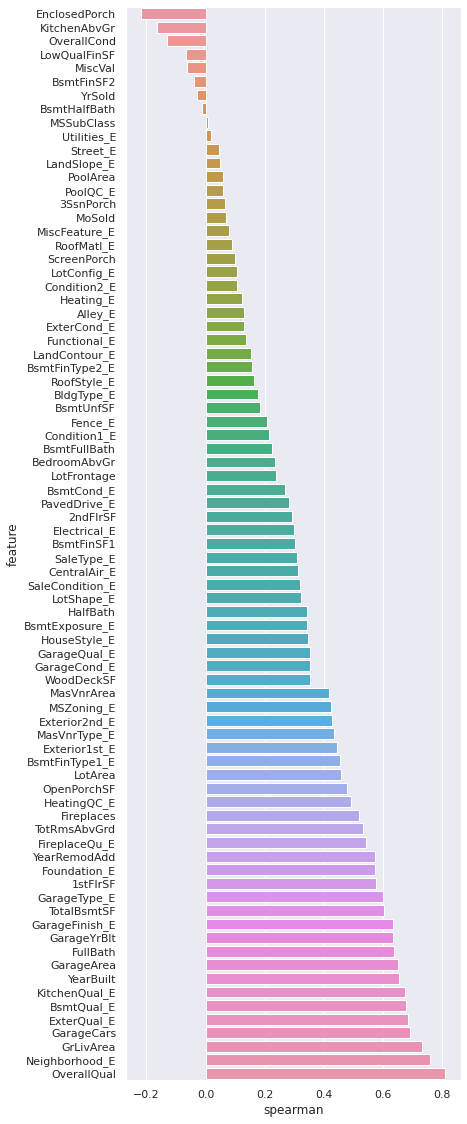

In [24]:
#Plot correlations between SalePrice and independent variables, while ignoring confounding variables
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice_Log'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6,0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(df_train, features)

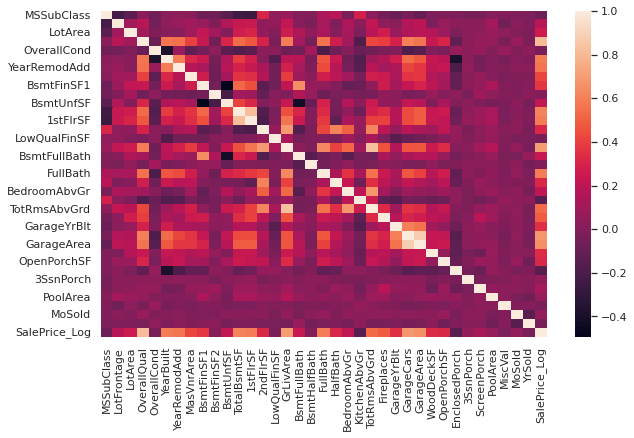

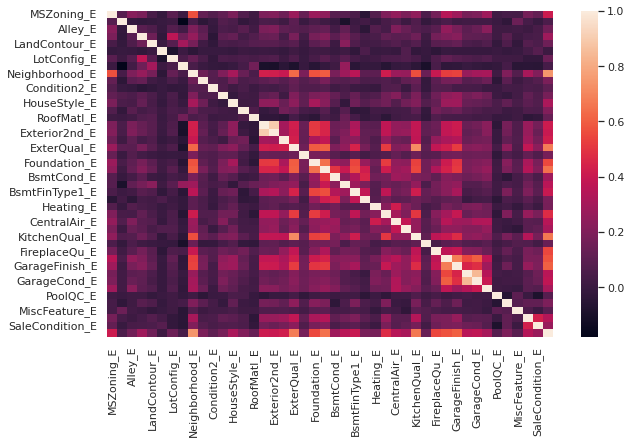

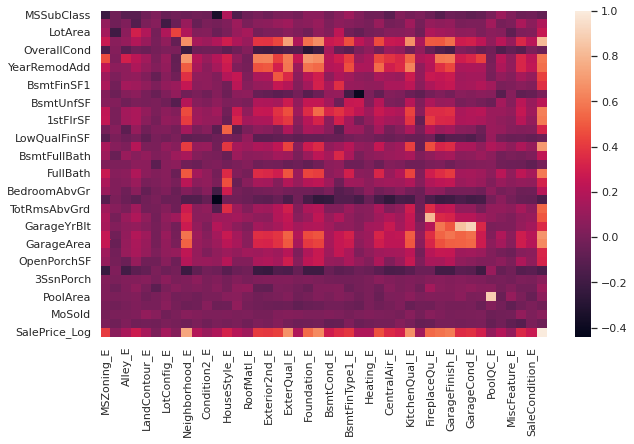

In [25]:
#Plot heatmaps to find correlations between variables (and any confounding variables)
plt.figure(1)
corr = df_train[quantitative+['SalePrice_Log']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = df_train[qual_encoded+['SalePrice_Log']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice_Log'], columns=qual_encoded+['SalePrice_Log'])
for q1 in quantitative+['SalePrice_Log']:
    for q2 in qual_encoded+['SalePrice_Log']:
        corr.loc[q1, q2] = df_train[q1].corr(df_train[q2])
sns.heatmap(corr)

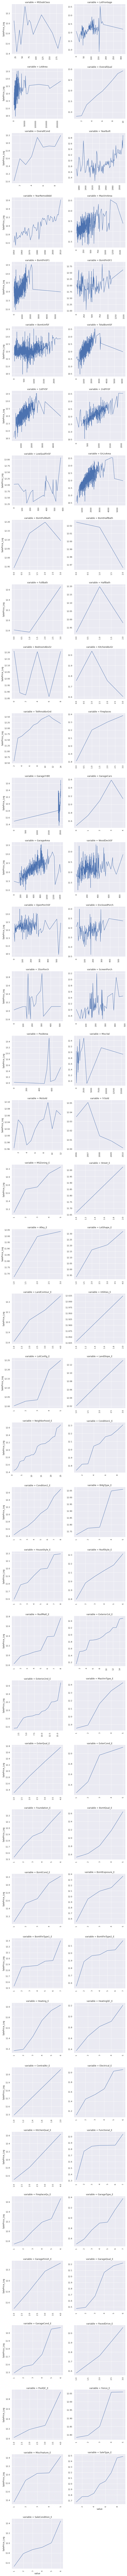

In [26]:
#Plot pairplots to determine how SalePrice changes with each independent variable
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df_train, id_vars=['SalePrice_Log'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "SalePrice_Log")

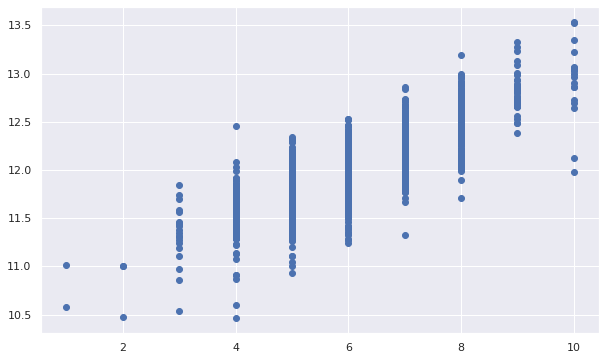

In [27]:
#Plot OverallQual vs SalePrice
plt.scatter(df_train['OverallQual'],df_train['SalePrice_Log'])

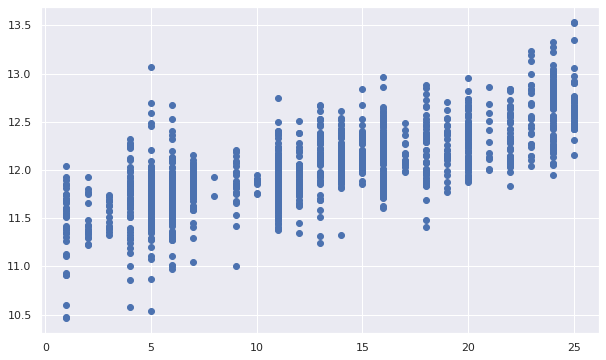

In [28]:
#Plot Neighborhood_E vs SalePrice
plt.scatter(df_train['Neighborhood_E'],df_train['SalePrice_Log'])

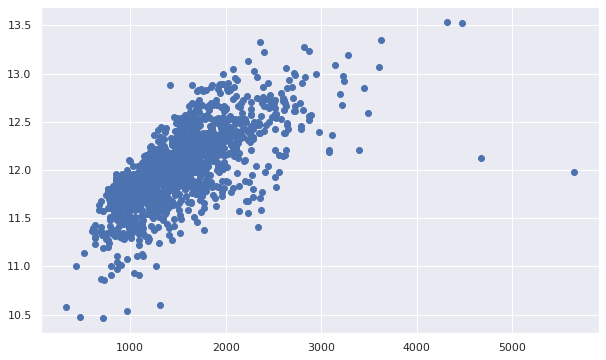

In [29]:
#Plot GrLivArea vs SalePrice
plt.scatter(df_train['GrLivArea'],df_train['SalePrice_Log'])

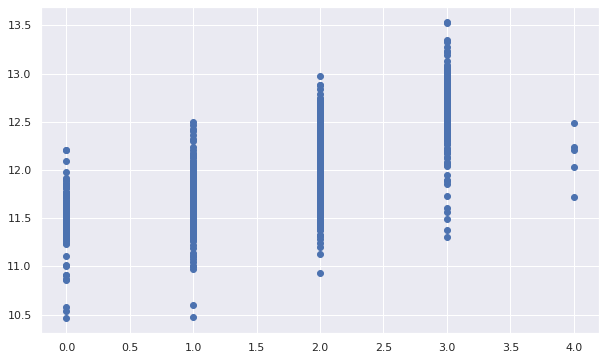

In [30]:
#Plot GarageCars vs SalePrice
plt.scatter(df_train['GarageCars'],df_train['SalePrice_Log'])

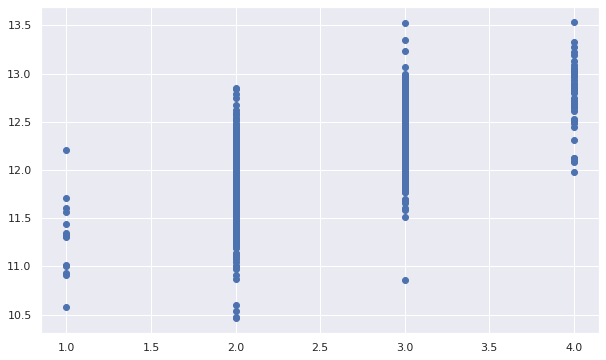

In [31]:
#Plot ExterQual_E vs SalePrice
plt.scatter(df_train['ExterQual_E'],df_train['SalePrice_Log'])

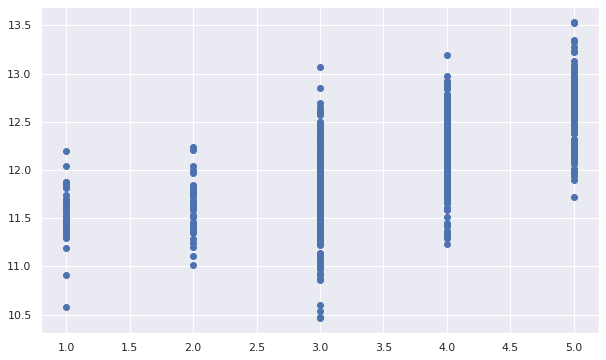

In [32]:
#Plot BsmtQual_E vs SalePrice
plt.scatter(df_train['BsmtQual_E'],df_train['SalePrice_Log'])

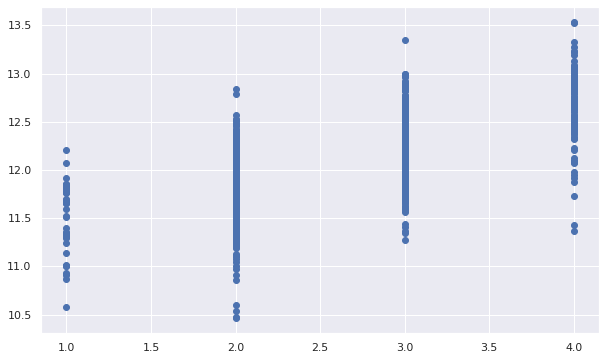

In [33]:
#Plot KitchenQual_E vs SalePrice
plt.scatter(df_train['KitchenQual_E'],df_train['SalePrice_Log'])

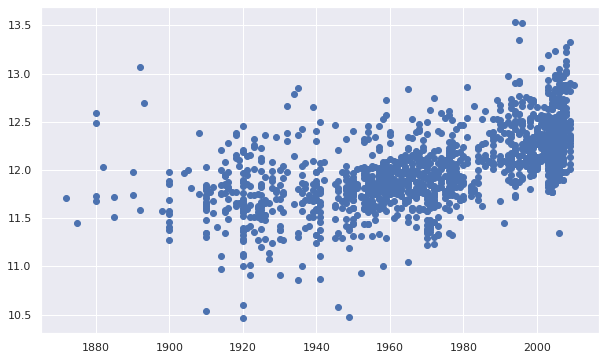

In [34]:
#Plot YearBuilt vs SalePrice
plt.scatter(df_train['YearBuilt'],df_train['SalePrice_Log'])

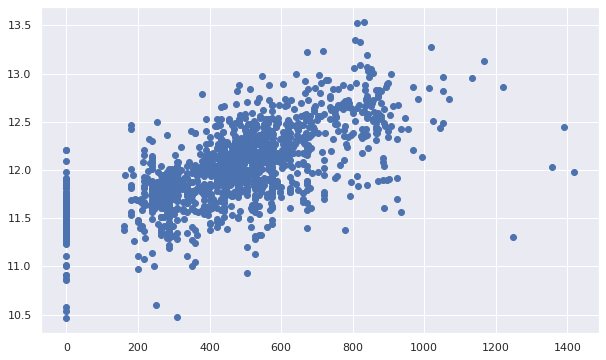

In [35]:
#Plot GarageArea vs SalePrice
plt.scatter(df_train['GarageArea'],df_train['SalePrice_Log'])

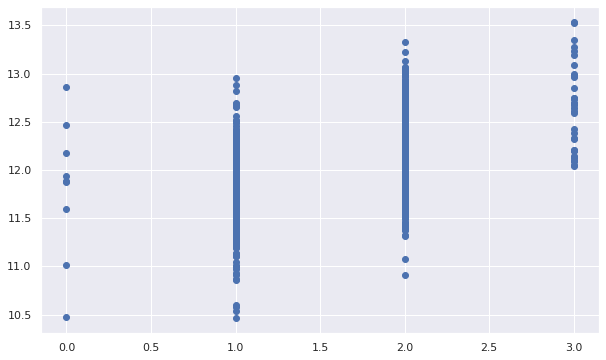

In [36]:
#Plot FullBath vs SalePrice
plt.scatter(df_train['FullBath'],df_train['SalePrice_Log'])

### Temporal Variable Analysis

In [37]:
#Temporal Variables
year_feature = [features for features in quantitative if 'Yr' in features or 'Year' in features]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

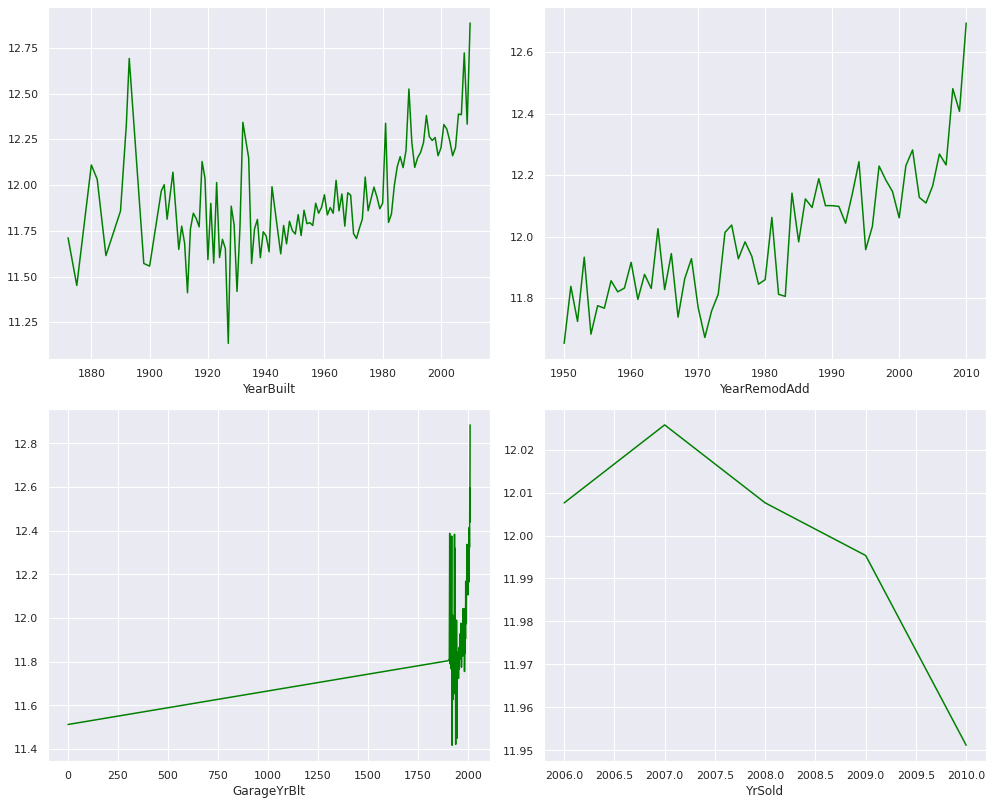

In [38]:
# Establishing relationship between Year Features and dependent feature Sale Price

sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,22))

a=len(year_feature)   # No. of rows in subplot
b=2                   # No. of plots in each row
c=1                   # Figure Counter

data=df_train.copy()  # Making a dataset copy

for features in year_feature:
    plt.subplot(a,b,c)
    
    # Plotting median prices for each features grouping by Year
    data.groupby(features)['SalePrice_Log'].median().plot(color='green')
    plt.xticks(rotation=0)  # Using Xticks so that the label in in proper orientation
    c=c+1 # Incrementing figure counter

fig.tight_layout()
plt.show()

As houses get older their value declines. This could be due to structural depreciation or the internal house becoming outdated as styles change over the years. We can confirm this by plotting the year the house was built or remodeled and the year it was sold. 

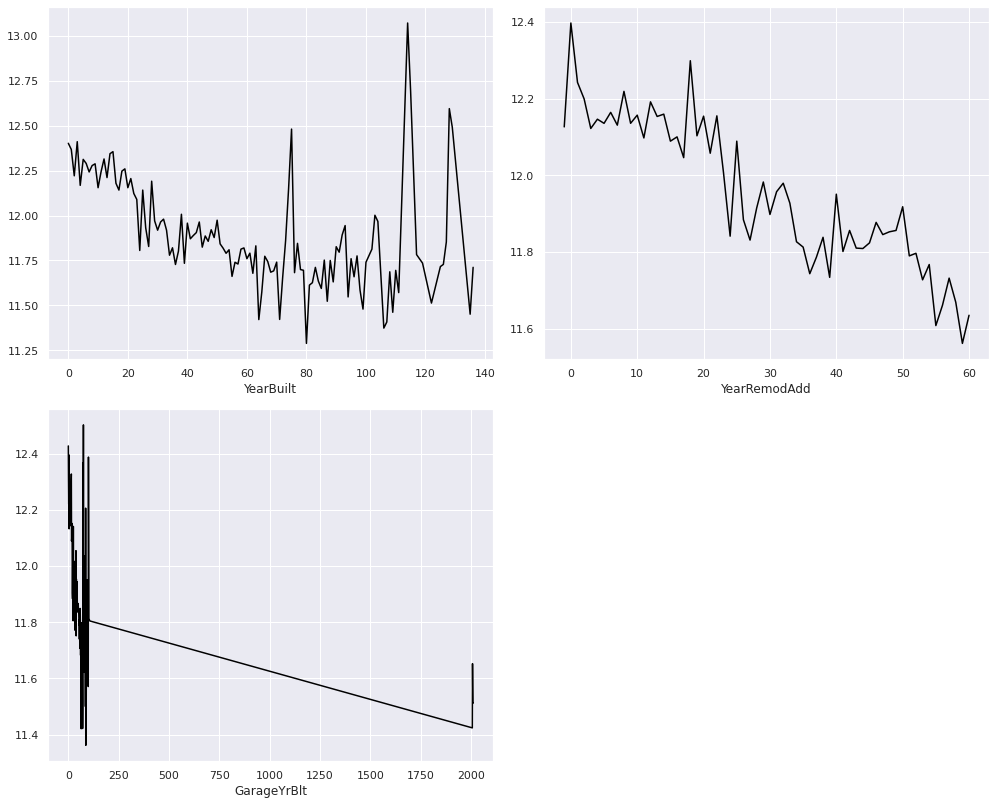

In [39]:
#Plot the difference between each Year Feature with YrSold

sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,22))

a=len(year_feature)   # No. of rows in subplot
b=2                   # No. of plots in each row
c=1                   # Figure Counter

data=df_train.copy()  # Making a dataset copy

for features in year_feature:
    if features != 'YrSold':
        # Finding the difference between Year feature and Year Sold
        data[features] = data['YrSold'] - data[features]
        plt.subplot(a,b,c)
        data.groupby(features)['SalePrice_Log'].median().plot(color='black')
        c = c+1

fig.tight_layout()
plt.show()

### Test Data - Removing nulls

In [40]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [41]:
temp = df_test.copy()
temp.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [42]:
#Create quantitative and qualitative independent variable sets
temp_quant = [f for f in temp.columns if temp.dtypes[f] != 'object']
temp_quant.remove('Id')
temp_qual = [f for f in temp.columns if temp.dtypes[f] == 'object']

In [43]:
#Replace null values with 0 for quantitative data and none for qualitative data in temp
for c in temp_qual:
    temp[c] = temp[c].astype('category')
    if temp[c].isnull().any():
        temp[c] = temp[c].cat.add_categories(['Missing'])
        temp[c] = temp[c].fillna('Missing')

temp[temp_quant] = temp[temp_quant].fillna(0)

In [44]:
temp.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  Missing      Reg   
1  1462          20       RL         81.0    14267   Pave  Missing      IR1   
2  1463          60       RL         74.0    13830   Pave  Missing      IR1   
3  1464          60       RL         78.0     9978   Pave  Missing      IR1   
4  1465         120       RL         43.0     5005   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0     Missing   
1             1          Gd             6        Typ           0     Missing   
2             1          TA             6        Typ           1          TA   
3          

### Log Normal Transformation

In [45]:
#Select quantitative variables to transform to log normal, excluding temporal variables
log_transform = [features for features in quantitative if features not in year_feature]

#Log Normal Transformnation of numerical features
def log_normal(dataframe,log_transform):
    for i in log_transform:
        if(0 in dataframe[i].unique()):
            pass
        else:
            dataframe[i] = np.log(dataframe[i])
    return dataframe

df_train = log_normal(df_train,log_transform)

In [46]:
log_transform_temp = [features for features in quantitative if features not in year_feature and 
                      features!= 'SalePrice']

In [47]:
#Function to do log normal transformation
def log_normal_temp(dataframe,log_transform_temp):
    for i in log_transform_temp:
        if(0 in dataframe[i].unique()):
            pass
        else:
            dataframe[i] = np.log(dataframe[i])
    return dataframe

temp = log_normal_temp(temp,log_transform_temp)

In [48]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1    4.094345       RL         65.0  9.041922   Pave  Missing      Reg   
1   2    2.995732       RL         80.0  9.169518   Pave  Missing      Reg   
2   3    4.094345       RL         68.0  9.328123   Pave  Missing      IR1   
3   4    4.248495       RL         60.0  9.164296   Pave  Missing      IR1   
4   5    4.094345       RL         84.0  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story     1.945910     1.609438       2003   
1       Norm     1Fam     1Story     1.791759     2.079442       1976   
2       Norm     1Fam     2Story     1.945910     1.609438       2001   
3       Norm     1Fam     2Story     1.945910     1.609438       1915   
4       Norm     1Fam     2Story     2.079442     1.609438       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd      2.079442        Typ           0     Missing   
1             1          TA      1.791759        Typ           1          TA   
2             1          Gd      1.791759        Typ           1          TA   
3             1

In [49]:
temp.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0  1461    2.995732       RH         80.0  9.360655   Pave  Missing      Reg   
1  1462    2.995732       RL         81.0  9.565704   Pave  Missing      IR1   
2  1463    4.094345       RL         74.0  9.534595   Pave  Missing      IR1   
3  1464    4.094345       RL         78.0  9.208138   Pave  Missing      IR1   
4  1465    4.787492       RL         43.0  8.518193   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story     1.609438     1.791759       1961   
1       Norm     1Fam     1Story     1.791759     1.791759       1958   
2       Norm     1Fam     2Story     1.609438     1.609438       1997   
3       Norm     1Fam     2Story     1.791759     1.791759       1998   
4       Norm   TwnhsE     1Story     2.079442     1.609438       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr  6.797940         0             0   
1    GasA        TA          Y      SBrkr  7.192182         0             0   
2    GasA        Gd          Y      SBrkr  6.833032       701             0   
3    GasA        Ex          Y      SBrkr  6.830874       678             0   
4    GasA        Ex          Y      SBrkr  7.154615         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   6.797940           0.0           0.0         1         0             2   
1   7.192182           0.0           0.0         1         1             3   
2   7.395722           0.0           0.0         2         1             3   
3   7.380256           0.0           0.0         2         1             3   
4   7.154615           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA      1.609438        Typ           0     Missing   
1             1          Gd      1.791759        Typ           0     Missing   
2             1          TA      1.791759        Typ           1          TA   
3    

### One Hot Encoding and Label Encoding

In [50]:
#Many features which has an exponential relationship with dependent variable Sale Price
#Label Encode those features and use One Hot Encoder to give model a clear relationship between the features

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

lebel_encoder = LabelEncoder()
One_encoder = OneHotEncoder(drop='first')

In [51]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1    4.094345       RL         65.0  9.041922   Pave  Missing      Reg   
1   2    2.995732       RL         80.0  9.169518   Pave  Missing      Reg   
2   3    4.094345       RL         68.0  9.328123   Pave  Missing      IR1   
3   4    4.248495       RL         60.0  9.164296   Pave  Missing      IR1   
4   5    4.094345       RL         84.0  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story     1.945910     1.609438       2003   
1       Norm     1Fam     1Story     1.791759     2.079442       1976   
2       Norm     1Fam     2Story     1.945910     1.609438       2001   
3       Norm     1Fam     2Story     1.945910     1.609438       1915   
4       Norm     1Fam     2Story     2.079442     1.609438       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd      2.079442        Typ           0     Missing   
1             1          TA      1.791759        Typ           1          TA   
2             1          Gd      1.791759        Typ           1          TA   
3             1

In [52]:
# categorical features which only have Two sub categories
two_subcat = [features for features in qualitative if len(df_train[features].unique())==2]
df_train[two_subcat].head()

Street Utilities CentralAir
0   Pave    AllPub          Y
1   Pave    AllPub          Y
2   Pave    AllPub          Y
3   Pave    AllPub          Y
4   Pave    AllPub          Y

In [53]:
# Getting all the elements which has only two unique categories inside them
two_subcat_temp = [features for features in qualitative if len(temp[features].unique())==2]
temp[two_subcat_temp].head()

Street Utilities CentralAir
0   Pave    AllPub          Y
1   Pave    AllPub          Y
2   Pave    AllPub          Y
3   Pave    AllPub          Y
4   Pave    AllPub          Y

In [54]:
# Categorical features which have two sub categories are convetred into numerical counter-part.
data = df_train.copy()

for features in two_subcat:
    lis = data[features].unique()
    data[features] = np.where(data[features]==lis[0],1,0)

In [55]:
# Doing the same for the test data
for features in two_subcat_temp:
    lis_temp = temp[features].unique()
    temp[features] = np.where(temp[features]==lis_temp[0],1,0)

In [56]:
# Label Encoding rest of the categorical features
for c in qualitative:
    label_encoder = LabelEncoder() 
    label_encoder.fit(list(data[c].values)) 
    data[c] = label_encoder.transform(list(data[c].values))

In [57]:
# Doing the same for test data
for c in temp_qual:
    label_encoder = LabelEncoder() 
    label_encoder.fit(list(temp[c].values)) 
    temp[c] = label_encoder.transform(list(temp[c].values))

In [58]:
# Giving back the dataset after manupulation
df = data

In [59]:
df[qualitative].head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      1         3            3          1          4   
1         3       1      1         3            3          1          2   
2         3       1      1         0            3          1          4   
3         3       1      1         0            3          1          0   
4         3       1      1         0            3          1          2   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0          0             5           2           2         0           5   
1          0            24           1           2         0           2   
2          0             5           2           2         0           5   
3          0             6           2           2         0           5   
4          0            15           2           2         0           5   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  \
0          1         1           12           13           1          2   
1          1         1            8            8           3          3   
2          1         1           12           13           1          2   
3          1         1           13           15           3          3   
4          1         1           12           13           1          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           2         2         4             4             2   
1          4           1         2         4             1             0   
2          4           2         2         4             3             2   
3          4           0         4         1             4             0   
4          4           2         2         4             0             2   

   BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
0             6        1          0           1           5            2   
1             6        1          0           1           5            3   
2             6        1          0           1           5            2   
3             6        1          2           1           5            2   
4             6        1          0           1           5            2   

   Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  \
0           6            3           1             2           5           5   
1           6            5           1             2           5           5   
2           6            5           1             2           5           5   
3           6            2           5             3           5           5   
4           6            5           1             2           5           5   

   PavedDrive  PoolQC  Fence  MiscFeature  SaleType  SaleCondition  
0           2       3      2            1         8              4  
1           2       3      2            1         8              4  
2           2       3      2            1         8              4  
3           2       3      2            1         8              0  
4           2       3      2            1         8              4

In [60]:
df.sample(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
1317  1318    4.787492         1         47.0  8.349957       1      2   
30      31    4.248495         0         50.0  9.047821       1      2   
522    523    3.912023         4         50.0  8.517193       1      1   
201    202    2.995732         3         75.0  9.222763       1      1   
1076  1077    3.912023         3         60.0  9.287301       1      0   
1103  1104    2.995732         3         79.0  9.094930       1      1   
420    421    4.499810         4         78.0  8.862200       1      1   
542    543    2.995732         3         78.0  9.224243       1      1   
1372  1373    4.094345         3         75.0  9.185023       1      1   
508    509    4.248495         4         60.0  9.169518       1      1   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
1317         3            3          1          0          0            21   
30           3            3          1          4          0             9   
522          3            3          1          0          0             3   
201          3            3          1          4          0            11   
1076         3            3          1          4          0            17   
1103         3            3          1          0          0            12   
420          3            3          1          4          0            11   
542          3            3          1          4          0            14   
1372         3            3          1          0          0             5   
508          3            3          1          4          0            17   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
1317           2           2         4           2     1.945910     1.609438   
30             1           2         0           5     1.386294     1.386294   
522            1           2         0           0     1.791759     1.945910   
201            2           2         0           2     1.791759     1.791759   
1076           2           2         0           0     1.609438     2.079442   
1103           2           2         0           2     1.791759     1.791759   
420            2           2         2           6     1.945910     1.609438   
542            6           2         0           2     1.945910     1.609438   
1372           2           2         0           5     1.945910     1.791759   
508            2           2         0           5     1.945910     2.197225   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
1317       2006          2007          1         1           12           13   
30         1920          1950          2         1            3            3   
522        1947          1950          1         1            5            5   
201        1977          1977          1         1            9           10   
1076       1936          1989          1         1           13           14   
1103       1959          1959          3         1            3            3   
420        1997          1998          1         1           12           13   
542        1998          1999          3         1           12           13   
1372       1998          1998          1         1           12           13   
508        1928          2005          2         1            8            8   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
1317           3         0.0          2          4           2         0   
30             3         0.0          3          1           0         4   
522            3         0.0          3          2           1         4   
201            3         0.0          3          4           1         4   
1076           3         0.0          3          4           1         1   
1103           3         0.0          3          4           1         4   
420            1       200.0          3 

In [61]:
temp.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0  1461    2.995732         3         80.0  9.360655       1      1         3   
1  1462    2.995732         4         81.0  9.565704       1      1         0   
2  1463    4.094345         4         74.0  9.534595       1      1         0   
3  1464    4.094345         4         78.0  9.208138       1      1         0   
4  1465    4.787492         4         43.0  8.518193       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          1          4          0            12           1   
1            3          1          0          0            12           2   
2            3          1          4          0             8           2   
3            3          1          4          0             8           2   
4            1          1          4          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2     1.609438     1.791759       1961   
1           2         0           2     1.791759     1.791759       1958   
2           2         0           4     1.609438     1.609438       1997   
3           2         0           4     1.791759     1.791759       1998   
4           2         4           2     2.079442     1.609438       1992   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1961          1         0           11           13           3   
1          1958          3         0           12           14           1   
2          1998          1         0           11           13           3   
3          1998          1         0           11           13           1   
4          1992          1         0            6            6           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         4         4   
1       108.0          3          4           1         4         4   
2         0.0          3          4           2         2         4   
3        20.0          3          4           2         4         4   
4         0.0          2          4           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             5       468.0             3       144.0   
1             4             0       923.0             6         0.0   
2             4             2       791.0             6         0.0   
3             4             2       602.0             6         0.0   
4             4             0       263.0             6         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      270.0        882.0        0          4           1           3   
1      406.0       1329.0        0          4           1           3   
2      137.0        928.0        0          2           1           3   
3      324.0        926.0        0          0           1           3   
4     1017.0       1280.0        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.797940         0             0   6.797940           0.0           0.0   
1  7.192182         0             0   7.192182           0.0           0.0   
2  6.833032       701             0   7.395722           0.0           0.0   
3  6.830874       678             0   7.380256           0.0           0.0   
4  7.154615         0             0   7.154615           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            4      1.609438   
1         1         1             3             1            2      1.791759   
2         2         1             3             1            4      1.791759   
3         2         1             3            

### Feature Scaling

In [62]:
X_train = df.drop('SalePrice', axis=1)
X_train = X_train.drop(X_train.columns[80:124], axis=1)
X_train.shape

(1460, 80)

In [63]:
X_train.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1    4.094345         3         65.0  9.041922       1      1         3   
1   2    2.995732         3         80.0  9.169518       1      1         3   
2   3    4.094345         3         68.0  9.328123       1      1         0   
3   4    4.248495         3         60.0  9.164296       1      1         0   
4   5    4.094345         3         84.0  9.565214       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          1          4          0             5           2   
1            3          1          2          0            24           1   
2            3          1          4          0             5           2   
3            3          1          0          0             6           2   
4            3          1          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5     1.945910     1.609438       2003   
1           2         0           2     1.791759     2.079442       1976   
2           2         0           5     1.945910     1.609438       2001   
3           2         0           5     1.945910     1.609438       1915   
4           2         0           5     2.079442     1.609438       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           3   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           3   
4          2000          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         4   
1         0.0          3          4           1         2         4   
2       162.0          2          4           2         2         4   
3         0.0          3          4           0         4         1   
4       350.0          2          4           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             2         706             6           0   
1             1             0         978             6           0   
2             3             2         486             6           0   
3             4             0         216             6           0   
4             0             2         655             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          0           1           5   
1        284         1262        1          0           1           5   
2        434          920        1          0           1           5   
3        540          756        1          2           1           5   
4        490         1145        1          0           1           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2      2.079442   
1         2         0             3             1            3      1.791759   
2         2         1             3             1            2      1.791759   
3         1         0             3             1        

In [64]:
# Getting all the features except ID and SALE PRICE because we need them as column names after feature scaling
features = [features for features in X_train.columns]

In [65]:
# Using MinMaxScaler for scaling the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [66]:
# Converting the array returned by sclaer to dataframe
temp = pd.DataFrame(scaler.transform(temp),columns=features)

In [67]:
# Converting the array returned by sclaer to dataframe for X_train
X_train = pd.concat([df['SalePrice'].reset_index(drop=True),pd.DataFrame(scaler.transform(X_train),columns=features)],axis=1)

In [68]:
X_train.head()

SalePrice        Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
0     208500 -1.730865    0.430516 -0.045532     0.212877 -0.133231  0.064238   
1     181500 -1.728492   -1.128983 -0.045532     0.645747  0.113442  0.064238   
2     223500 -1.726120    0.430516 -0.045532     0.299451  0.420061  0.064238   
3     140000 -1.723747    0.649335 -0.045532     0.068587  0.103347  0.064238   
4     250000 -1.721374    0.430516 -0.045532     0.761179  0.878409  0.064238   

      Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0  0.024699  0.750731     0.314667    0.02618   0.604670  -0.225716   
1  0.024699  0.750731     0.314667    0.02618  -0.628316  -0.225716   
2  0.024699 -1.378933     0.314667    0.02618   0.604670  -0.225716   
3  0.024699 -1.378933     0.314667    0.02618  -1.861302  -0.225716   
4  0.024699 -1.378933     0.314667    0.02618  -0.628316  -0.225716   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0     -1.206215   -0.036289    -0.03174 -0.411691    1.026689     0.684385   
1      1.954302   -1.188074    -0.03174 -0.411691   -0.543457     0.045487   
2     -1.206215   -0.036289    -0.03174 -0.411691    1.026689     0.684385   
3     -1.039872   -0.036289    -0.03174 -0.411691    1.026689     0.684385   
4      0.457215   -0.036289    -0.03174 -0.411691    1.026689     1.237824   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0    -0.440508   1.050994      0.878668  -0.491516 -0.125797     0.743092   
1     1.884487   0.156734     -0.429577  -0.491516 -0.125797    -0.508251   
2    -0.440508   0.984752      0.830215  -0.491516 -0.125797     0.743092   
3    -0.440508  -1.863632     -0.720298  -0.491516 -0.125797     1.055928   
4    -0.440508   0.951632      0.733308  -0.491516 -0.125797     0.743092   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0     0.751626   -1.378962    0.514104  -0.777976   0.364207    0.835599   
1    -0.661060    0.533897   -0.570750   0.663451   0.364207   -0.549162   
2     0.751626   -1.378962    0.325915  -0.777976   0.364207    0.835599   
3     1.316701    0.533897   -0.570750   0.663451   0.364207   -1.933923   
4     0.751626   -1.378962    1.366489  -0.777976   0.364207    0.835599   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0 -0.566939  0.325405      0.651473     -0.510942    0.575425      0.344051   
1 -0.566939  0.325405     -1.281760     -1.399536    1.171992      0.344051   
2 -0.566939  0.325405      0.007062     -0.510942    0.092907      0.344051   
3  0.997770 -2.834848      0.651473     -1.399536   -0.499274      0.344051   
4 -0.566939  0.325405     -1.926170     -0.510942    0.463568      0.344051   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  \
0   -0.288653  -0.944591    -0.459303 -0.123046  -0.884658    0.263813   
1   -0.288653  -0.641228     0.466465 -0.123046  -0.884658    0.263813   
2   -0.288653  -0.301643    -0.313369 -0.123046  -0.884658    0.263813   
3   -0.288653  -0.061670    -0.687324 -0.123046   0.265476    0.263813   
4   -0.288653  -0.174865     0.199680 -0.123046  -0.884658    0.263813   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0    0.304256 -0.803570  1.161852     -0.120242   0.529260      1.107810   
1    0.304256  0.418585 -0.795163     -0.120242  -0.381846     -0.819964   
2    0.304256 -0.576560  1.189351     -0.120242   0.659675      1.107810   
3    0.304256 -0.439287  0.937276     -0.120242   0.541511      1.107810   
4    0.304256  0.112267  1.617877     -0.120242   1.282191      1.107810   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0     -0.241061  0.789741  1.227585      0.163779     -0.211454    -0.409369   
1      3.948809  0.789741 -0.761621      0.163779     -0.211454     0.795629   
2     -0.241061  0.789741  1.227585      0.163779     -0.211454    -0.409369   
3  

In [69]:
# Getting all the dependent feature values
y_train = X_train['SalePrice'].values

In [70]:
# Dropping Sale Price from train data
X_train = X_train.drop('SalePrice',axis=1)

##Modeling

##Conclusion